# **CIVIL AVIATION - DOMESTIC AIRLINES ANALYTICS - IND**

**1. IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import h5py
from datetime import datetime

import requests as re
import glob

import warnings
warnings.filterwarnings('ignore')

**2. READ DATA**

In [2]:
file = glob.glob("F:\download\civil_aviation_IND_2022\*")
# file

Each carrier-data file has 4 tables
1. row# : 01 - 15, agg_line# : 16
2. row# : 20 - 34, agg_line# : 35
3. row# : 39 - 53, agg_line# : 54
4. row# : 58 - 72, agg_line# : 73

In [3]:
carrier_name = file[0].split('\\')[-1].split('.')[0]

In [4]:
xl = pd.ExcelFile(file[0])

In [5]:
tbl_name = xl.parse(0).columns[2].split('\n ')[1][2:-1]

In [6]:
df = xl.parse(0, skiprows=1, nrows=13)  

**3. RENAME & MODIFY COLUMNS**

In [ ]:
carrier_map = {
    'Air Asia' : ['Air Asia']
    , 'Air India Express' : ['air india express']
    , 'Air India' : ['Air India']
    , 'Air Taxi' : ['air taxi']
    , 'Alliance Air' : ['alliance air']
    , 'Blue Dart' : ['bluedart']
    , 'FlyBig' : ['Flybig']
    , 'Go Air' : ['go air']
    , 'IndiGo' : ['indigo']
    , 'Pawan Hans' : ['pawanhans']
    , 'SpiceJet' : ['spicejet']
    , 'Star Air' : ['star air']
    , 'vistara' : ['vistara ']
}

In [7]:
col_names = {
    df.columns[0] : 'month'
    , df.columns[1] : 'dep(in_num)'
    , df.columns[2] : 'hours(in_num)'
    , df.columns[3] : 'km(in_thousand)'
    , df.columns[4] : 'pax_carried(in_num)'
    , df.columns[5] : 'pax_km_pfd(in_thousand)'
    , df.columns[6] : 'avail_seat_km(in_thousand)'
    , df.columns[7] : 'pax_load_factor(in_percentage)'
    , df.columns[8] : 'freight(in_tonne)'
    , df.columns[9] : 'mail(in_tonne)'
    , df.columns[10] : 'total_cargo(in_tonne)'
    , df.columns[11] : 'pax_tonne_km_pfd(in_tonne)'
    , df.columns[12] : 'freight_tonne_km_pfd(in_tonne)'
    , df.columns[13] : 'mail_tonne_km_pfd(in_tonne)'
    , df.columns[14] : 'total_tonne_km_pfd(in_tonne)'
    , df.columns[15] : 'avl_tonne_km_pfd(in_tonne)'
    , df.columns[16] : 'weight_load_factor(in_percentage)'
}

In [8]:
df = df.rename(columns=col_names).drop(0)
df['pax_load_factor(in_percentage)'] = df['pax_load_factor(in_percentage)'].apply(lambda x: 0 if x == ' ' else x)
df['weight_load_factor(in_percentage)'] = df['weight_load_factor(in_percentage)'].apply(lambda x: 0 if x == ' ' else x)
df.fillna(0, inplace=True)

In [9]:
for col in df.columns:
    if col == 'month':
        df[col] = df[col].astype('category')
        continue

    df[col] = df[col].astype('float64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 1 to 12
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   month                              12 non-null     category
 1   dep(in_num)                        12 non-null     float64 
 2   hours(in_num)                      12 non-null     float64 
 3   km(in_thousand)                    12 non-null     float64 
 4   pax_carried(in_num)                12 non-null     float64 
 5   pax_km_pfd(in_thousand)            12 non-null     float64 
 6   avail_seat_km(in_thousand)         12 non-null     float64 
 7   pax_load_factor(in_percentage)     12 non-null     float64 
 8   freight(in_tonne)                  12 non-null     float64 
 9   mail(in_tonne)                     12 non-null     float64 
 10  total_cargo(in_tonne)              12 non-null     float64 
 11  pax_tonne_km_pfd(in_tonne)         12 non-null 

In [11]:
df.head()

,month,dep(in_num),hours(in_num),km(in_thousand),pax_carried(in_num),pax_km_pfd(in_thousand),avail_seat_km(in_thousand),pax_load_factor(in_percentage),freight(in_tonne),mail(in_tonne),total_cargo(in_tonne),pax_tonne_km_pfd(in_tonne),freight_tonne_km_pfd(in_tonne),mail_tonne_km_pfd(in_tonne),total_tonne_km_pfd(in_tonne),avl_tonne_km_pfd(in_tonne),weight_load_factor(in_percentage)
1,JAN,2851.0,5296.583333,2851.298,295094.0,313575.255,518466.894,60.481249,2071.9702,214.0072,2285.9774,16785.019293,4770.631445,416.514125,21972.164863,57025.96,38.530110
2,FEB,3030.0,5768.566667,3119.247,445563.0,471344.230,566535.828,83.197603,2389.5908,210.9555,2600.5463,35350.817250,5975.507497,438.426649,41764.751396,62384.94,66.946849
3,MAR,4863.0,9305.250000,5047.264,698450.0,743853.248,915358.998,81.263553,3344.4881,292.3645,3636.8526,55788.993600,7753.565295,565.549828,64108.108723,100945.28,63.507782
4,APR,4290.0,8069.950000,4363.575,591907.0,630660.732,791899.578,79.638978,2857.0750,287.6709,3144.7459,47299.554900,7035.615210,601.799593,54936.969703,87271.50,62.949496
5,MAY,4949.0,9372.250000,5078.682,686362.0,731036.837,920890.236,79.383710,3184.4486,304.7933,3489.2419,54827.762775,7821.043269,648.302544,63297.108588,101573.64,62.316472


| column_name | definition |
| --- | --- |
| dep | Count of Departures. |
| hours | Total hours flown. |
| km | Total distance flown. |
| pax_carried | Total number of passengers carried. |
| pax_km_pfd | _Passenger kilometers performed_ - A passenger-kilometre is performed when a passenger is carried one kilometre. Passenger-kilometres equal the sum of the products obtained by multiplying the number of revenue passengers carried on each flight stage by the stage distance. The resultant figure is equal to the number of kilometres travelled by all passengers. |
| avail_seat_km | _Available Seat Kilometers (ASK)_ - captures the total flight passenger capacity of an airline in kilometers. It is obtained by multiplying the total number of seats available for scheduled passengers and the total number of kilometers in which those seats were flown. <br> A seat-kilometer is available when a seat that is available for carrying a passenger is flown one kilometer. Seats that are not usable for various reasons are excluded. |
| pax_load_factor | _Passenger Load Factor (PLF) or Load Factor (LF)_ - is an airline industry metric that measures how much of an airline’s passenger carrying capacity is used. Not to be confused with aeronautic load factor, PLF only measures capacity utilization. <br> $ \frac{passenger-kms-performed}{available-seat-kms} $ |
| freight | weight of cargo carried. |
| mail | weight of mail carried. |
| total_cargo | total weight of cargo and mail carried. |
| pax_tonne_km_pfd | _Passenger Tonne Kilometers Performed_ - The result obtained by multiplying the passenger kilometres flown by the weight of each of the passengers including both free and excess baggage. <br> _Each air transport operator can use its own internal passenger weights or the standard 90kgs (baggage included)._ |

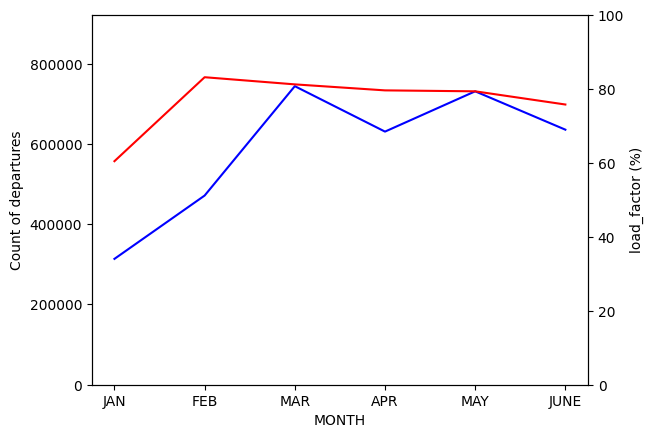

In [12]:
fig, ax = plt.subplots()

twin1 = ax.twinx()
# twin2 = ax.twinx()

ax.set_ylim(0, max(df['avail_seat_km(in_thousand)'].head(6)))
twin1.set_ylim(0, 100)

ax.set_xlabel('MONTH')
ax.set_ylabel("Count of departures")
twin1.set_ylabel("load_factor (%)")

p1 = ax.plot(df.month.head(6), df['pax_km_pfd(in_thousand)'].head(6), 'b-')
p2 = twin1.plot(df.month.head(6), df['pax_load_factor(in_percentage)'].head(6), 'r-')

plt.show()